# Transient State

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


--- เมทริกซ์การเปลี่ยนสถานะ (P) ---
[[0.8 0.2]
 [0.5 0.5]]

### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)
สถานะเริ่มต้น (เดือนที่ 0): โตโยต้า (Toyota)=10000 คน, ฮอนด้า (Honda)=10000 คน
จำลองเหตุการณ์ไปข้างหน้า 10 เดือน...

--- เดือนที่ 1 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 13000.00 คน, ฮอนด้า (Honda) = 7000.00 คน
  (ผลลัพธ์นี้ตรงกับตัวอย่าง 9.2: [13000, 7000])
--- เดือนที่ 2 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 13900.00 คน, ฮอนด้า (Honda) = 6100.00 คน
--- เดือนที่ 3 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14170.00 คน, ฮอนด้า (Honda) = 5830.00 คน
--- เดือนที่ 4 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14251.00 คน, ฮอนด้า (Honda) = 5749.00 คน
--- เดือนที่ 5 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14275.30 คน, ฮอนด้า (Honda) = 5724.70 คน
--- เดือนที่ 6 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14282.59 คน, ฮอนด้า (Honda) = 5717.41 คน
--- เดือนที่ 7 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14284.78 คน, ฮอนด้า (Honda) = 5715.22 คน
--- เดือนที่ 8 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14285.43 คน, ฮอนด้า (Honda) = 5714.57 คน
--- เ

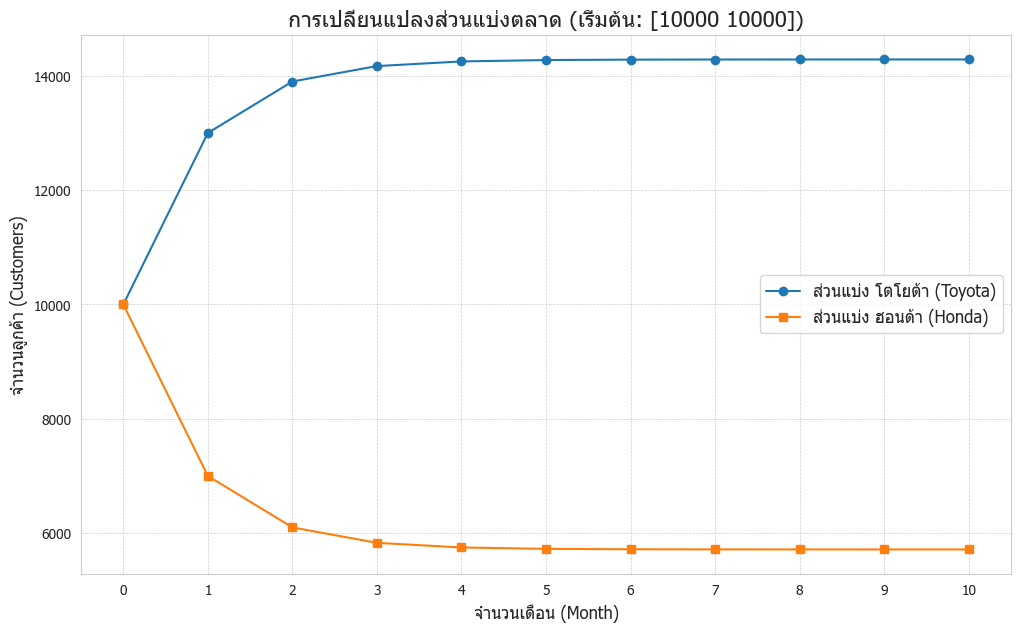

กราฟแสดงให้เห็นว่าส่วนแบ่งตลาดค่อยๆ เปลี่ยนแปลงในแต่ละเดือน
และกำลังลู่เข้าสู่ค่าคงที่ค่าหนึ่ง (สภาวะคงตัว)


In [4]:
# ==============================================================================
# ### 📈 เซลล์ที่ 1: สภาวะการเปลี่ยนแปลง (Transient State)
# ==============================================================================
#
# คำนวณการเปลี่ยนแปลงส่วนแบ่งตลาดในแต่ละเดือน (Month-by-Month)
# โดยใช้สมการ: [State_Next] = [State_Current] * [Transition_Matrix]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. ตั้งค่าพื้นฐาน (Setup) ---
# ตั้งค่าสไตล์กราฟและฟอนต์ (ถ้ามีฟอนต์ไทยในเครื่อง เช่น Tahoma, Sarabun)
sns.set_style("whitegrid")
try:
    plt.rcParams["font.family"] = "Tahoma"
except:
    print("ไม่พบฟอนต์ Tahoma, ใช้ฟอนต์เริ่มต้น")

# --- 2. กำหนดค่าจากโจทย์ (Problem Definition) ---
states = ["โตโยต้า (Toyota)", "ฮอนด้า (Honda)"]

# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.8, 0.2],  # แถวที่ 0: ลูกค้าโตโยต้า
    [0.5, 0.5]   # แถวที่ 1: ลูกค้าฮอนด้า
])

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
print(P)

# --- 3. การคำนวณ Transient State (แบบตัวอย่าง 9.2) ---
print("\n" + "="*60)
print("### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)")

# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values) ---
# เวกเตอร์สถานะเริ่มต้น (Initial State Vector - v_0)
# จากตัวอย่าง 9.2: [โตโยต้า, ฮอนด้า]
initial_counts = np.array([10000, 10000])

# จำนวนเดือนที่ต้องการจำลอง
n_months_to_simulate = 10
# --- 

print(f"สถานะเริ่มต้น (เดือนที่ 0): {states[0]}={initial_counts[0]} คน, {states[1]}={initial_counts[1]} คน")
print(f"จำลองเหตุการณ์ไปข้างหน้า {n_months_to_simulate} เดือน...\n")

# สร้าง list เพื่อเก็บประวัติการเปลี่ยนแปลง
history_transient = [initial_counts]
current_v = initial_counts

for month in range(1, n_months_to_simulate + 1):
    # คำนวณสถานะถัดไป: v_next = v_current * P
    next_v = np.dot(current_v, P)
    
    print(f"--- เดือนที่ {month} ---")
    print(f"  ผลลัพธ์: {states[0]} = {next_v[0]:.2f} คน, {states[1]} = {next_v[1]:.2f} คน")
    
    # ตรวจสอบกับโจทย์ 9.2 (ถ้าเป็นเดือนที่ 1)
    if month == 1 and np.array_equal(initial_counts, [10000, 10000]):
        print(f"  (ผลลัพธ์นี้ตรงกับตัวอย่าง 9.2: [13000, 7000])")
        
    # อัปเดตค่าสำหรับรอบถัดไป
    history_transient.append(next_v)
    current_v = next_v

# แปลง history เป็น numpy array สำหรับ plot
history_transient = np.array(history_transient)

# --- 4. การแสดงผลด้วยกราฟ (Visualization) ---
print("\n" + "="*60)
print("### กราฟแสดงการเปลี่ยนแปลง (Transient Plot)")

plt.figure(figsize=(12, 7))

# พลอตกราฟจากประวัติ
plt.plot(history_transient[:, 0], label=f"ส่วนแบ่ง {states[0]}", marker='o', linestyle='-')
plt.plot(history_transient[:, 1], label=f"ส่วนแบ่ง {states[1]}", marker='s', linestyle='-')

plt.title(f"การเปลี่ยนแปลงส่วนแบ่งตลาด (เริ่มต้น: {initial_counts})", fontsize=16)
plt.xlabel("จำนวนเดือน (Month)", fontsize=12)
plt.ylabel("จำนวนลูกค้า (Customers)", fontsize=12)
plt.xticks(range(n_months_to_simulate + 1))
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("กราฟแสดงให้เห็นว่าส่วนแบ่งตลาดค่อยๆ เปลี่ยนแปลงในแต่ละเดือน")
print("และกำลังลู่เข้าสู่ค่าคงที่ค่าหนึ่ง (สภาวะคงตัว)")

# Steady State

In [ ]:
# ==============================================================================
# ### ⚖️ เซลล์ที่ 2: สภาวะคงตัว (Steady State)
# ==============================================================================
#
# คำนวณหาส่วนแบ่งตลาด "ในระยะยาว" หรือ "จุดสมดุล"
# โดยหาค่า π (พาย) ที่สอดคล้องกับสมการ: π = π * P

import numpy as np

# --- 1. กำหนดค่าจากโจทย์ (Problem Definition) ---
states = ["โตโยต้า (Toyota)", "ฮอนด้า (Honda)"]

# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.8, 0.2],  # แถวที่ 0: ลูกค้าโตโยต้า
    [0.5, 0.5]   # แถวที่ 1: ลูกค้าฮอนด้า
])

# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values) ---
# จากตัวอย่าง 9.3:
total_customers = 20000
# ---

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
print(P)
print(f"\nจำนวนลูกค้ารวมในตลาด: {total_customers} คน")
print("กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$")


# --- 2. วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---
# (คำนวณ P^n โดยที่ n มีค่ามากๆ เช่น 100)
print("\n--- วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---")
P_steady = np.linalg.matrix_power(P, 100) 

# สัดส่วนในสภาวะคงตัว (π) (หยิบแถวไหนก็ได้)
steady_state_prob = P_steady[0] 
print(f"สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:")
print(f"  π_{states[0]}: {steady_state_prob[0]:.6f} (หรือ {steady_state_prob[0]*100:.2f}%)")
print(f"  π_{states[1]}: {steady_state_prob[1]:.6f} (หรือ {steady_state_prob[1]*100:.2f}%)")


# --- 3. วิธีที่ 2: การคำนวณทางพีชคณิต (Eigenvector) ---
# (เป็นวิธีที่แม่นยำกว่า)
print("\n--- วิธีที่ 2: การคำนวณ Eigenvector (ทางพีชคณิต) ---")
# หา Eigenvector ของ P Transpose (P.T)
eigenvalues, eigenvectors = np.linalg.eig(P.T) 

# หา Eigenvalue ที่ใกล้ 1 ที่สุด
steady_state_index = np.argmin(np.abs(eigenvalues - 1.0))

# ดึง Eigenvector ที่สอดคล้องกัน
pi_vector_unnormalized = eigenvectors[:, steady_state_index]

# Normalization (ทำให้ผลรวมเป็น 1)
pi_vector = np.real(pi_vector_unnormalized / np.sum(pi_vector_unnormalized))

print(f"สัดส่วนตลาด π (จาก Eigenvector):")
print(f"  π_{states[0]}: {pi_vector[0]:.6f}")
print(f"  π_{states[1]}: {pi_vector[1]:.6f}")
print("(ผลลัพธ์จาก 2 วิธีควรจะเหมือนกัน)")


# --- 4. สรุปจำนวนลูกค้าในสภาวะคงตัว (ตามโจทย์ 9.3) ---
print("\n" + "="*60)
print("### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)")

# ใช้สัดส่วนที่คำนวณได้ (steady_state_prob หรือ pi_vector) คูณกับลูกค้ารวม
X_toyota = pi_vector[0] * total_customers
Y_honda = pi_vector[1] * total_customers

print(f"  X (ลูกค้า {states[0]}): {X_toyota:.2f} คน")
print(f"  (Total - X) (ลูกค้า {states[1]}): {Y_honda:.2f} คน")

# ตรวจสอบคำตอบกับสมการในโจทย์ 9.3: [X, (20000-X)] * P = [X, (20000-X)]
check_vector = np.array([X_toyota, Y_honda])
result_vector = np.dot(check_vector, P)

print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")
print(f"  $\pi$ (ซ้ายมือ) = [{check_vector[0]:.2f}, {check_vector[1]:.2f}]")
print(f"  $\pi \cdot P$ (ขวามือ) = [{result_vector[0]:.2f}, {result_vector[1]:.2f}]")
print("  (ผลลัพธ์ 2 ฝั่งเท่ากัน แสดงว่าถูกต้อง)")

--- เมทริกซ์การเปลี่ยนสถานะ (P) ---
[[0.8 0.2]
 [0.5 0.5]]

จำนวนลูกค้ารวมในตลาด: 20000 คน
กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$

--- วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---
สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:
  π_โตโยต้า (Toyota): 0.714286 (หรือ 71.43%)
  π_ฮอนด้า (Honda): 0.285714 (หรือ 28.57%)

--- วิธีที่ 2: การคำนวณ Eigenvector (ทางพีชคณิต) ---
สัดส่วนตลาด π (จาก Eigenvector):
  π_โตโยต้า (Toyota): 0.714286
  π_ฮอนด้า (Honda): 0.285714
(ผลลัพธ์จาก 2 วิธีควรจะเหมือนกัน)

### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)
  X (ลูกค้า โตโยต้า (Toyota)): 14285.71 คน
  (Total - X) (ลูกค้า ฮอนด้า (Honda)): 5714.29 คน

--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---
  $\pi$ (ซ้ายมือ) = [14285.71, 5714.29]
  $\pi \cdot P$ (ขวามือ) = [14285.71, 5714.29]
  (ผลลัพธ์ 2 ฝั่งเท่ากัน แสดงว่าถูกต้อง)


<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:78: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:80: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:78: SyntaxWarning: invalid escape sequence '\p'
<>:79: SyntaxWarning: invalid escape sequence '\p'
<>:80: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\3657056123.py:27: SyntaxWarning: invalid escape sequence '\p'
  print("กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$")
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\3657056123.py:78: SyntaxWarning: invalid escape sequence '\p'
  print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\3657056123.py:79: SyntaxWarning: invalid escape sequence '\p'
  print(f"  $\pi$ (ซ้ายมือ) = [{check_vector[0]:.2f}, {check_vector[1]:.2f}]")
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\3657056

# ผงซักฟอก

In [ ]:
# ==============================================================================
# ### ⚖️ เซลล์ที่ 2: สภาวะคงตัว (Steady State)
# ==============================================================================
#
# คำนวณหาส่วนแบ่งตลาด "ในระยะยาว" หรือ "จุดสมดุล"
# โดยหาค่า π (พาย) ที่สอดคล้องกับสมการ: π = π * P

import numpy as np

# --- 1. กำหนดค่าจากโจทย์ (Problem Definition) ---
states = ["A", "B", "C"]

# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.5, 0.2, 0.3],  # แถวที่ 0: A
    [0.3, 0.5, 0.2],   # แถวที่ 1: B
    [0.2, 0.3, 0.5]    # แถวที่ 2: C

])

# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values) ---
# จากตัวอย่าง 9.3:
total_customers = 20000
# ---

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
print(P)
print(f"\nจำนวนลูกค้ารวมในตลาด: {total_customers} คน")
print("กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$")


# --- 2. วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---
# (คำนวณ P^n โดยที่ n มีค่ามากๆ เช่น 100)
print("\n--- วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---")
P_steady = np.linalg.matrix_power(P, 100) 

# สัดส่วนในสภาวะคงตัว (π) (หยิบแถวไหนก็ได้)
steady_state_prob = P_steady[0] 

for i in range(len(steady_state_prob)):
    print(f"สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:")
    print(f"  π_{states[i]}: {steady_state_prob[i]:.6f} (หรือ {steady_state_prob[i]*100:.2f}%)")



# --- 3. วิธีที่ 2: การคำนวณทางพีชคณิต (Eigenvector) ---
# (เป็นวิธีที่แม่นยำกว่า)
print("\n--- วิธีที่ 2: การคำนวณ Eigenvector (ทางพีชคณิต) ---")
# หา Eigenvector ของ P Transpose (P.T)
eigenvalues, eigenvectors = np.linalg.eig(P.T) 

# หา Eigenvalue ที่ใกล้ 1 ที่สุด
steady_state_index = np.argmin(np.abs(eigenvalues - 1.0))

# ดึง Eigenvector ที่สอดคล้องกัน
pi_vector_unnormalized = eigenvectors[:, steady_state_index]

# Normalization (ทำให้ผลรวมเป็น 1)
pi_vector = np.real(pi_vector_unnormalized / np.sum(pi_vector_unnormalized))

for i in range(len(pi_vector)):

    print(f"สัดส่วนตลาด π (จาก Eigenvector):")
    print(f"  π_{states[i]}: {pi_vector[i]:.6f}")
    
print("(ผลลัพธ์จาก 2 วิธีควรจะเหมือนกัน)")


# --- 4. สรุปจำนวนลูกค้าในสภาวะคงตัว (ตามโจทย์ 9.3) ---
print("\n" + "="*60)
print("### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)")

# ใช้สัดส่วนที่คำนวณได้ (steady_state_prob หรือ pi_vector) คูณกับลูกค้ารวม
X_toyota = pi_vector[0] * total_customers
Y_honda = pi_vector[1] * total_customers

print(f"  X (ลูกค้า {states[0]}): {X_toyota:.2f} คน")
print(f"  (Total - X) (ลูกค้า {states[1]}): {Y_honda:.2f} คน")

# ตรวจสอบคำตอบกับสมการในโจทย์ 9.3: [X, (20000-X)] * P = [X, (20000-X)]
check_vector = np.array([X_toyota, Y_honda])
result_vector = np.dot(check_vector, P)

print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")
print(f"  $\pi$ (ซ้ายมือ) = [{check_vector[0]:.2f}, {check_vector[1]:.2f}]")
print(f"  $\pi \cdot P$ (ขวามือ) = [{result_vector[0]:.2f}, {result_vector[1]:.2f}]")
print("  (ผลลัพธ์ 2 ฝั่งเท่ากัน แสดงว่าถูกต้อง)")

--- เมทริกซ์การเปลี่ยนสถานะ (P) ---
[[0.5 0.2 0.3]
 [0.3 0.5 0.2]
 [0.2 0.3 0.5]]

จำนวนลูกค้ารวมในตลาด: 20000 คน
กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$

--- วิธีที่ 1: การยกกำลังเมทริกซ์ (Power Iteration) ---
สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:
  π_A: 0.333333 (หรือ 33.33%)
สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:
  π_B: 0.333333 (หรือ 33.33%)
สัดส่วนตลาด (Probabilities) ในสภาวะคงตัว:
  π_C: 0.333333 (หรือ 33.33%)

--- วิธีที่ 2: การคำนวณ Eigenvector (ทางพีชคณิต) ---
สัดส่วนตลาด π (จาก Eigenvector):
  π_A: 0.333333
สัดส่วนตลาด π (จาก Eigenvector):
  π_B: 0.333333
สัดส่วนตลาด π (จาก Eigenvector):
  π_C: 0.333333
(ผลลัพธ์จาก 2 วิธีควรจะเหมือนกัน)

### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)
  X (ลูกค้า A): 6666.67 คน
  (Total - X) (ลูกค้า B): 6666.67 คน


<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\762193895.py:29: SyntaxWarning: invalid escape sequence '\p'
  print("กำลังค้นหาส่วนแบ่งตลาด (π) ที่ $\pi = \pi \cdot P$")
